In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
TRAIN_BATCH_SIZE=64
TEST_BATCH_SIZE=32
IMG_SIZE=150

In [3]:
os.chdir("E:\DataSets\Xray\chest_xray")
path=os.getcwd()

In [5]:
#this function to see how many images are in each class in each folders
def size_datasets(data_set):
    
    size_images=dict()
    
    for folder in os.listdir(path+"/"+data_set):
        
        for image in os.listdir(path+"/"+data_set+"/"+folder):
            
            images=glob.glob(path+"/"+data_set+"/"+folder+"/*.jpeg")
            
        size_images[folder]=len(images)
        print(f"There are {len(images)} in {folder} folder in {data_set} path")
        
    return size_images

In [6]:
size_images_train=size_datasets("train")

There are 1341 in NORMAL folder in train path
There are 3875 in PNEUMONIA folder in train path


In [7]:
size_images_test=size_datasets("test")

There are 234 in NORMAL folder in test path
There are 390 in PNEUMONIA folder in test path


In [8]:
size_images_val=size_datasets("val")

There are 8 in NORMAL folder in val path
There are 8 in PNEUMONIA folder in val path


In [9]:
def draw_distribution_of_datasets(size_images):
    labels=size_images.keys()
    values=size_images.values()
    plt.pie(values,labels=labels,autopct='%1.1f%%')
    plt.title("Distribution  of Datasets")

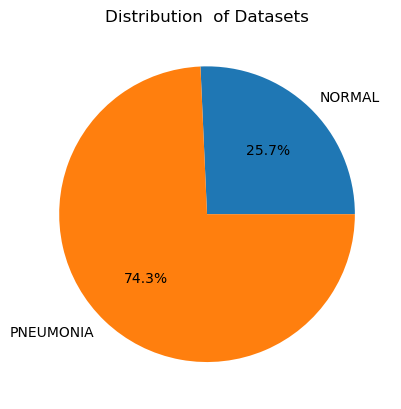

In [10]:
draw_distribution_of_datasets(size_images_train)

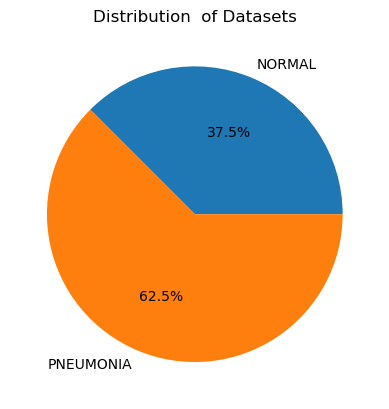

In [11]:
draw_distribution_of_datasets(size_images_test)

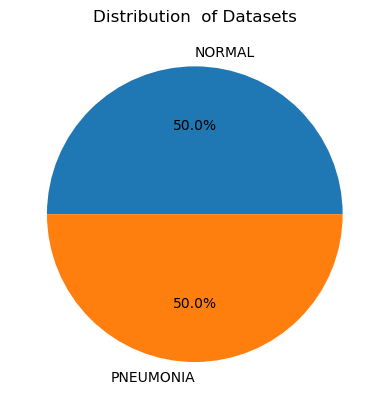

In [12]:
draw_distribution_of_datasets(size_images_val)

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    zoom_range=0.3,
    rotation_range=0.3,
)

test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train = train_datagen.flow_from_directory(
    "train",
    batch_size=TRAIN_BATCH_SIZE,
    class_mode="binary",
    target_size=(IMG_SIZE,IMG_SIZE),
    shuffle=True
)

test = train_datagen.flow_from_directory(
    "test",
    batch_size=TEST_BATCH_SIZE,
    class_mode="binary",
    target_size=(IMG_SIZE,IMG_SIZE),
    shuffle=True
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
classes=train.class_indices
classes

{'NORMAL': 0, 'PNEUMONIA': 1}

In [16]:
#function to get class by value
def get_key(val):
    for key,value in classes.items():
        if val==value:
            return key

In [17]:
#function to draw images from train or test datasets
def draw_images(datagen):
    plt.figure(figsize=(12,12))
    for i in range(16):
        plt.subplot(4,4,i+1)
        for X_batch,y_batch in datagen:
            image=X_batch[0]
            label=y_batch[0]
            plt.imshow(image)
            plt.title(get_key(label))
            plt.axis("off")
            break

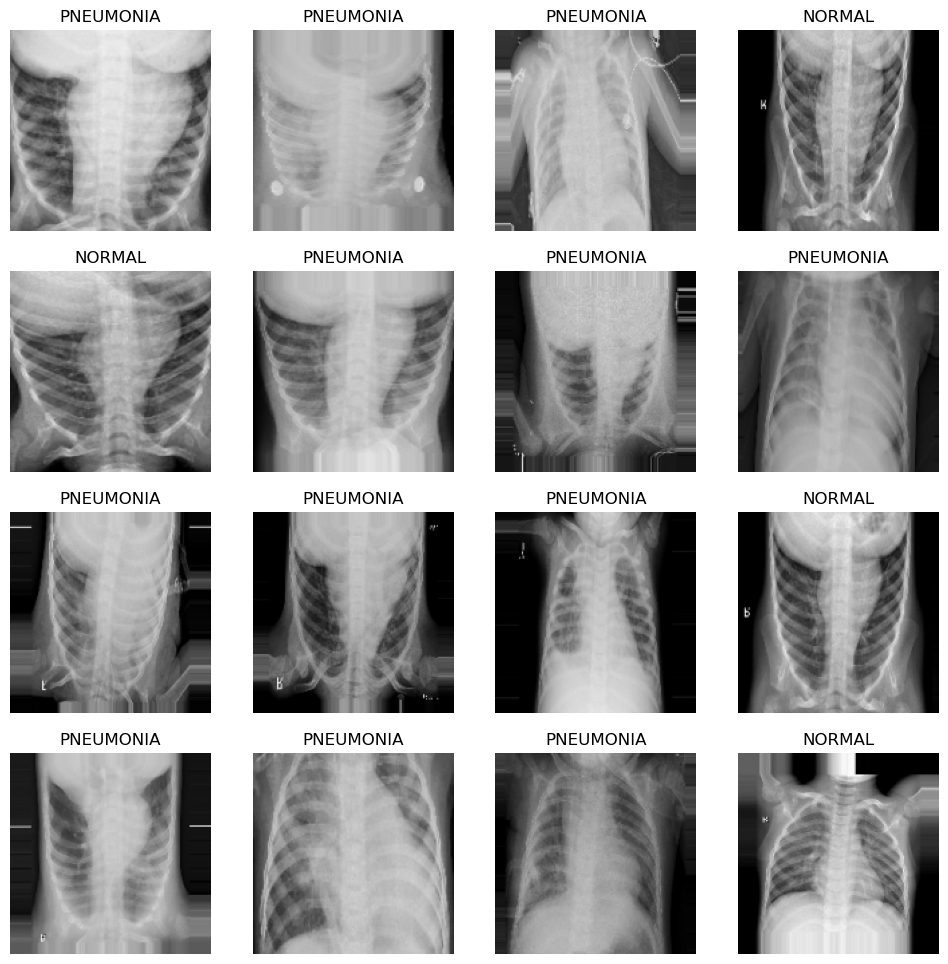

In [18]:
draw_images(train)

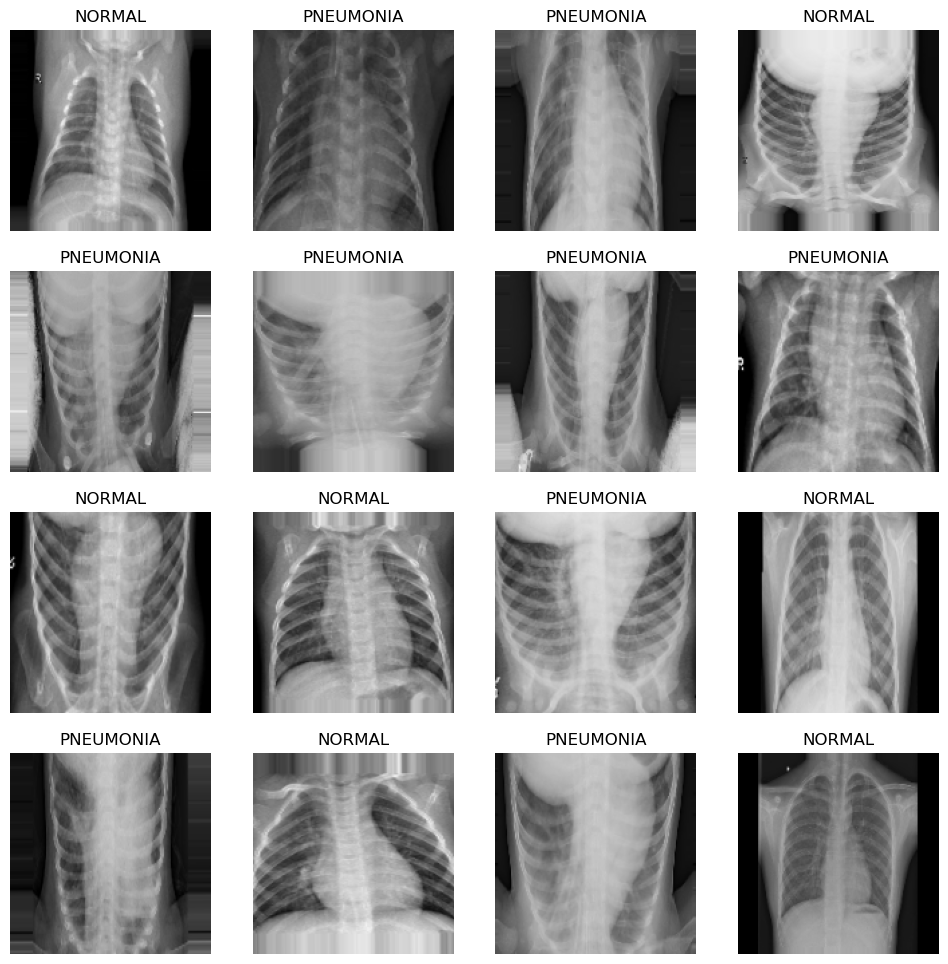

In [19]:
draw_images(test)

In [30]:
model = Sequential()

#first layer
model.add(Conv2D(16,(3,3),input_shape=(IMG_SIZE,IMG_SIZE,3),activation="relu"))
model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))

#second layer
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))

#third layer
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))

#fourth layer
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

#fully connected layer
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 conv2d_19 (Conv2D)          (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 71, 71, 32)        4640      
                                                                 
 conv2d_21 (Conv2D)          (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                  

In [32]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [34]:
history = model.fit(train,validation_data=test,epochs=10)

Epoch 1/10
82/82 [==============================] - 242s 3s/step - loss: 0.5381 - accuracy: 0.7531 - val_loss: 0.8750 - val_accuracy: 0.6715
Epoch 2/10
82/82 [==============================] - 217s 3s/step - loss: 0.3546 - accuracy: 0.8344 - val_loss: 0.4270 - val_accuracy: 0.7837
Epoch 3/10
82/82 [==============================] - 202s 2s/step - loss: 0.3183 - accuracy: 0.8562 - val_loss: 0.5637 - val_accuracy: 0.7660
Epoch 4/10
82/82 [==============================] - 202s 2s/step - loss: 0.3094 - accuracy: 0.8662 - val_loss: 0.4316 - val_accuracy: 0.8061
Epoch 5/10
82/82 [==============================] - 192s 2s/step - loss: 0.2929 - accuracy: 0.8762 - val_loss: 0.4373 - val_accuracy: 0.8045
Epoch 6/10
82/82 [==============================] - 213s 3s/step - loss: 0.2629 - accuracy: 0.8855 - val_loss: 0.4461 - val_accuracy: 0.8253
Epoch 7/10
82/82 [==============================] - 211s 3s/step - loss: 0.2733 - accuracy: 0.8865 - val_loss: 0.6350 - val_accuracy: 0.7644
Epoch 8/10
82

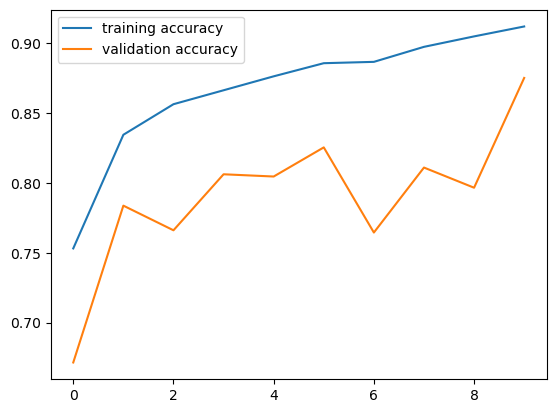

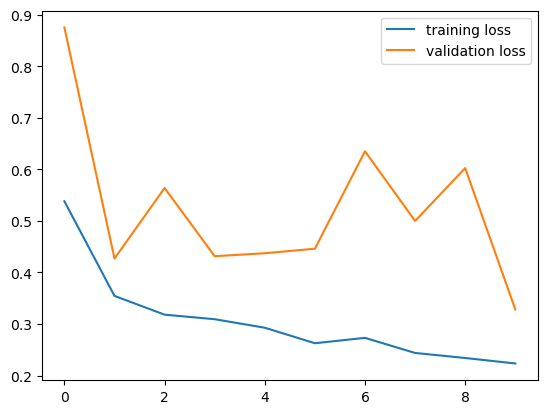

In [78]:
for i,met in enumerate(["accuracy","loss"]):
    plt.figure(i)
    plt.plot(history.history[met],label="training "+met)
    plt.plot(history.history["val_"+met],label="validation "+met)
    plt.legend()

In [39]:
import keras

# Save the model architecture and weights
model.save('my_model.h5')
model.save_weights('my_model_weights.h5')

# Load the saved model architecture and weights
loaded_model = keras.models.load_model('my_model.h5')
loaded_model.load_weights('my_model_weights.h5')


In [40]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [41]:
loaded_model.fit(train, validation_data=test, epochs=6)

Epoch 1/6
82/82 [==============================] - 211s 3s/step - loss: 0.2297 - accuracy: 0.9007 - val_loss: 0.3044 - val_accuracy: 0.8718
Epoch 2/6
82/82 [==============================] - 176s 2s/step - loss: 0.2083 - accuracy: 0.9183 - val_loss: 0.3852 - val_accuracy: 0.8510
Epoch 3/6
82/82 [==============================] - 174s 2s/step - loss: 0.2168 - accuracy: 0.9130 - val_loss: 0.7015 - val_accuracy: 0.8141
Epoch 4/6
82/82 [==============================] - 187s 2s/step - loss: 0.2132 - accuracy: 0.9122 - val_loss: 0.4192 - val_accuracy: 0.8349
Epoch 5/6
82/82 [==============================] - 188s 2s/step - loss: 0.2067 - accuracy: 0.9139 - val_loss: 0.3771 - val_accuracy: 0.8638
Epoch 6/6
82/82 [==============================] - 162s 2s/step - loss: 0.2002 - accuracy: 0.9220 - val_loss: 0.4020 - val_accuracy: 0.8638


In [82]:
def predict_image(img_path):
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Make the prediction
    prediction = loaded_model.predict(img)
    print(prediction)
    # Convert the prediction to a class label
    predicted_class = "PNEUMONIA" if prediction > 0.5 else "NORMAL"

    img_show=plt.imread(img_path)
    plt.imshow(img_show,cmap="gray")
    plt.title("Predicted Class : " + predicted_class)
    plt.axis("off")

1/1 [==============================] - 0s 31ms/step
[[0.97603583]]


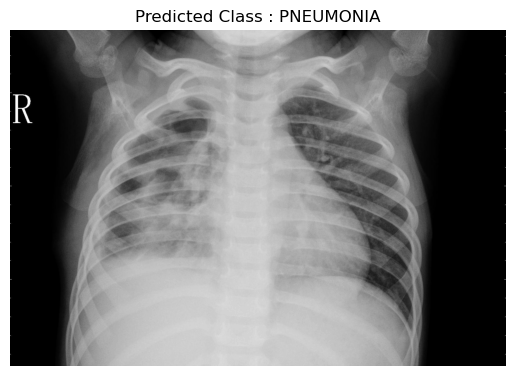

In [83]:
predict_image(r"E:\DataSets\Xray\chest_xray\val\PNEUMONIA\person1954_bacteria_4886.jpeg")

1/1 [==============================] - 0s 32ms/step
[[0.08426686]]


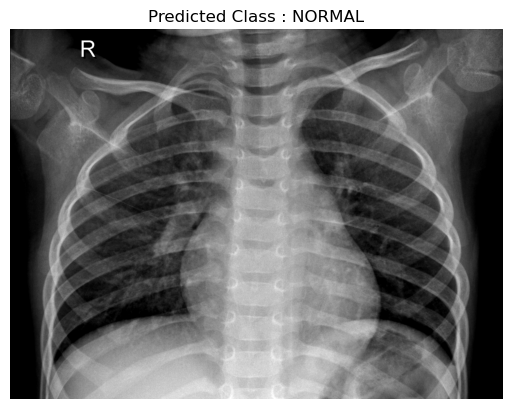

In [84]:
predict_image(r"E:\DataSets\Xray\chest_xray\val\NORMAL\NORMAL2-IM-1440-0001.jpeg")